---
title: "Bar charts in fisheries data visualization using python"
summary: "This post is about bar charts for fisheries data visualization using python"
author: "Hoang Nguyen"
date: "2020-12-28"

tags: [data visualization, python]
categories: [data visualization, python]

links:
 - name: Follow
   url: https://www.linkedin.com/in/hoangng84/
   icon_pack: fab
   icon: linkedin

image:
  caption: ""
  focal_point: ""
  preview_only: true
  
project: "data-viz-in-FS-python"
widget: "blogs"
---

<p style="text-align: justify;">
Thanks to the amazing people making such useful libraries such as matplotlib, pandas, and numpy. They make coding heaps more efficient and easier. To begin with, it is required to install some neccesary libraries for this example.</p>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Data exploration

In [2]:
# importing data
age_at_length = pd.read_csv("age_length_data.csv")
catch_at_length = pd.read_csv("catch_length.csv")
# data exploration 
print(type(age_at_length))
print(age_at_length.shape)
print(age_at_length.dtypes)

print(type(catch_at_length))
print(catch_at_length.shape)
print(catch_at_length.dtypes)

<class 'pandas.core.frame.DataFrame'>
(65, 13)
length    int64
age.3     int64
age.4     int64
age.5     int64
age.6     int64
age.7     int64
age.8     int64
age.9     int64
age.10    int64
age.11    int64
age.12    int64
age.13    int64
age.14    int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
(65, 2)
Length    int64
Count     int64
dtype: object


### Visualization of catch at length

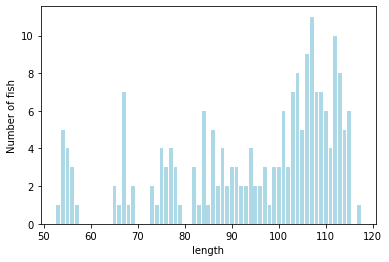

In [3]:
plt.bar(catch_at_length.Length,catch_at_length.Count, color = "lightblue")
plt.xlabel("length")
plt.ylabel("Number of fish")
plt.show()

<center>Figure 1. Barplot of Catch at length</center>

### Visualization of catch at age

In [4]:
age_at_length_select = age_at_length.drop(["length"], axis=1)
age_at_length["total"] = age_at_length_select.sum(axis=1)
age_at_length_proportion = age_at_length_select.div(age_at_length.total, axis = 0)
catch_at_age = age_at_length_proportion.mul(catch_at_length.Count, axis = 0)
catch_at_age_sum = catch_at_age.sum(axis = 0)

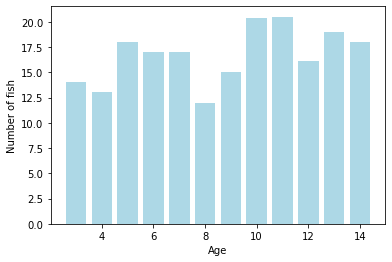

In [5]:
plt.bar(pd.Series(np.arange(3,15,1)),catch_at_age_sum, color = "lightblue")
plt.xlabel("Age")
plt.ylabel("Number of fish")
plt.show()

<center> Figure 2. Bar plot of catch at age </center>

### Visualization of the distribution of age at length

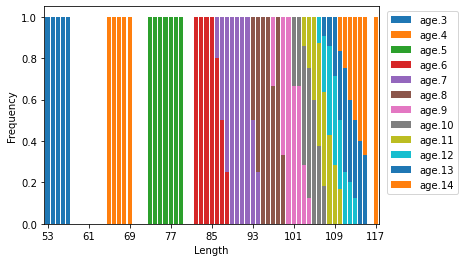

In [13]:
age_at_length_plot = age_at_length_proportion.plot(kind="bar", stacked = True, width = .8)
age_at_length_plot.set_xticklabels(np.arange(53,118,1), rotation = 0)
age_at_length_plot.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.legend(bbox_to_anchor = (1.25,1), loc = "upper right")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

<center> Figure 3. Bar plot of age at length distribution </center>

In [7]:
catch_at_length_ts = pd.read_csv("catch.at.length.ts1.csv")
catch_at_length_ts_select = catch_at_length_ts.drop(["length"], axis = 1)

In [8]:
S1 = {}
S2 = {}
S3 = {}
S4 = {}

X = age_at_length_proportion
Y = catch_at_length_ts_select

for i in range(0, len(Y.columns)):
    S1[i] = Y[Y.columns[i]]
    S2[i] = X.mul(S1[i], axis = 0)
    S3[i] = S2[i].apply(np.sum, axis = 0)
    S4[i] = S3[i].div(S3[i].sum(axis = 0))

col_name2 = np.arange(1959,2017,1)
catch_at_age = pd.DataFrame(S4)
catch_at_age = catch_at_age.set_axis(col_name2, axis = 1, inplace = False)
catch_at_age_t = catch_at_age.T

### Visualization of the distribution of catch at age over time

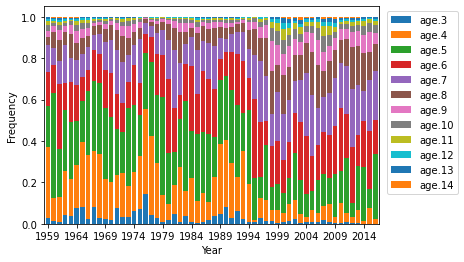

In [14]:
catch_at_age_plot = catch_at_age_t.plot(kind = "bar", stacked = True, width = .8)
catch_at_age_plot.set_xticklabels(np.arange(1959,2017,1), rotation = 0)
catch_at_age_plot.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.legend(bbox_to_anchor = (1.25,1), loc = "upper right")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

<center> Figure 4. Bar plot of catch at age over time </center>